In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from xgboost.sklearn import XGBClassifier
import warnings
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('train_users_2.csv/train_users_2.csv')
df_test = pd.read_csv('test_users.csv/test_users.csv')

In [3]:
labels = df_train.country_destination.values
id_test = df_train.id

df_train.drop(['country_destination'],axis = 1)

df_all = pd.concat((df_train,df_test),axis = 0 ,ignore_index=True)

In [4]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       275547 non-null  object 
 1   date_account_created     275547 non-null  object 
 2   timestamp_first_active   275547 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   275547 non-null  object 
 5   age                      158681 non-null  float64
 6   signup_method            275547 non-null  object 
 7   signup_flow              275547 non-null  int64  
 8   language                 275547 non-null  object 
 9   affiliate_channel        275547 non-null  object 
 10  affiliate_provider       275547 non-null  object 
 11  first_affiliate_tracked  269462 non-null  object 
 12  signup_app               275547 non-null  object 
 13  first_device_type        275547 non-null  object 
 14  firs

In [5]:
for col in df_all.columns:
    
    check = df_all[col].isnull().sum()
    if check !=0 :
        print(col + " has {} null values".format(check))

date_first_booking has 186639 null values
age has 116866 null values
first_affiliate_tracked has 6085 null values
country_destination has 62096 null values


In [6]:
df_all.drop(['id','date_first_booking'],axis = 1,inplace = True)

In [7]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date_account_created     275547 non-null  object 
 1   timestamp_first_active   275547 non-null  int64  
 2   gender                   275547 non-null  object 
 3   age                      158681 non-null  float64
 4   signup_method            275547 non-null  object 
 5   signup_flow              275547 non-null  int64  
 6   language                 275547 non-null  object 
 7   affiliate_channel        275547 non-null  object 
 8   affiliate_provider       275547 non-null  object 
 9   first_affiliate_tracked  269462 non-null  object 
 10  signup_app               275547 non-null  object 
 11  first_device_type        275547 non-null  object 
 12  first_browser            275547 non-null  object 
 13  country_destination      213451 non-null  object 
dtypes: f

In [8]:
df_all['age'].describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

In [9]:
def age_limit(x):
    if x>=100:
        return np.nan
    elif x<15:
        return np.nan
    return x

In [10]:
df_all.age = df_all.age.apply(
    lambda x : age_limit(x)
)

In [11]:
df_all['date_account_created'] = pd.to_datetime(df_all['date_account_created'])
df_all['timestamp_first_active'] = pd.to_datetime(df_all['timestamp_first_active'], 
                                                  format='%Y%m%d%H%M%S')

In [12]:
df_all['date_account_created']

0        2010-06-28
1        2011-05-25
2        2010-09-28
3        2011-12-05
4        2010-09-14
            ...    
275542   2014-09-30
275543   2014-09-30
275544   2014-09-30
275545   2014-09-30
275546   2014-09-30
Name: date_account_created, Length: 275547, dtype: datetime64[ns]

In [13]:
sns.set_style('whitegrid')
sns.set_context("talk")

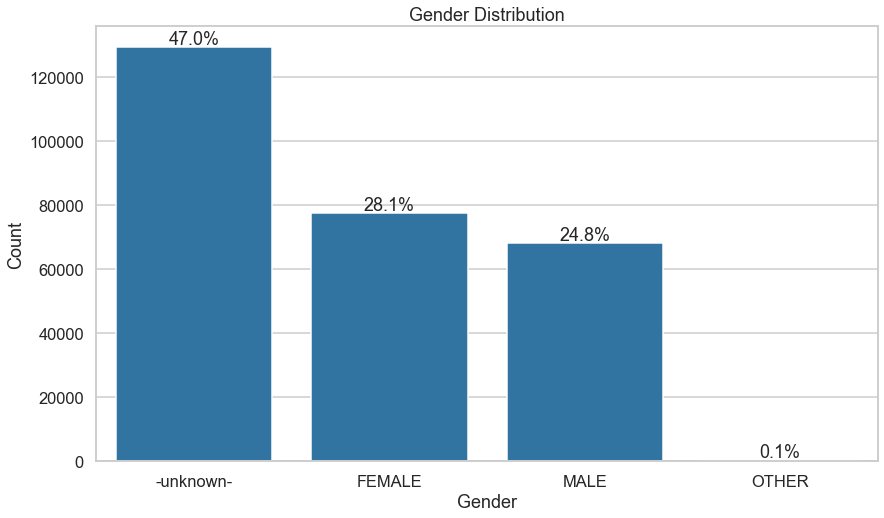

In [14]:
plt.figure(figsize=(14,8))
order1 = df_all['gender'].value_counts().index
sns.countplot(data = df_all, x = 'gender', order = order1, color = sns.color_palette()[0])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
order2 = df_all['gender'].value_counts()

for idx in range(order2.shape[0]):
    
    count = order2[idx]
    getstr = '{:0.1f}%'.format(100*count/df_all.shape[0])
    plt.text(idx,count+1000,getstr,ha= 'center')

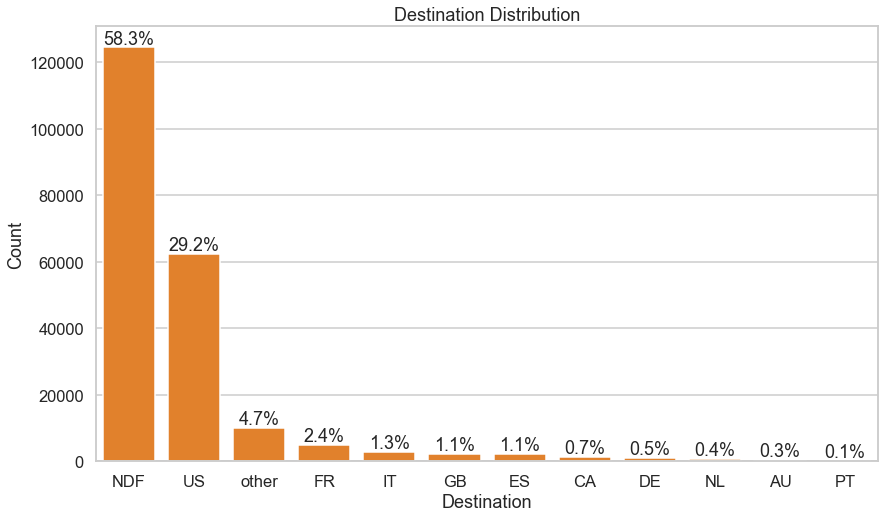

In [15]:
plt.figure(figsize=(14,8))
order1 = df_train['country_destination'].value_counts().index
sns.countplot(data = df_train, x = 'country_destination', order = order1, color = sns.color_palette()[1])
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Destination Distribution')
order2 = df_train['country_destination'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    getstr='{:0.1f}%'.format(100*count / df_train.shape[0])
    plt.text(i,count+1000,getstr,ha='center')

In [41]:
df_all['acc_year'] = df_all['date_account_created'].dt.year

df_year = df_all.groupby('acc_year').count()
year = df_all.acc_year.unique().sort()
yearsOrder=pd.api.types.CategoricalDtype(ordered=True, categories=year)
df_year.reset_index(inplace = True)
df_year.acc_year = df_year.acc_year.astype(yearsOrder)

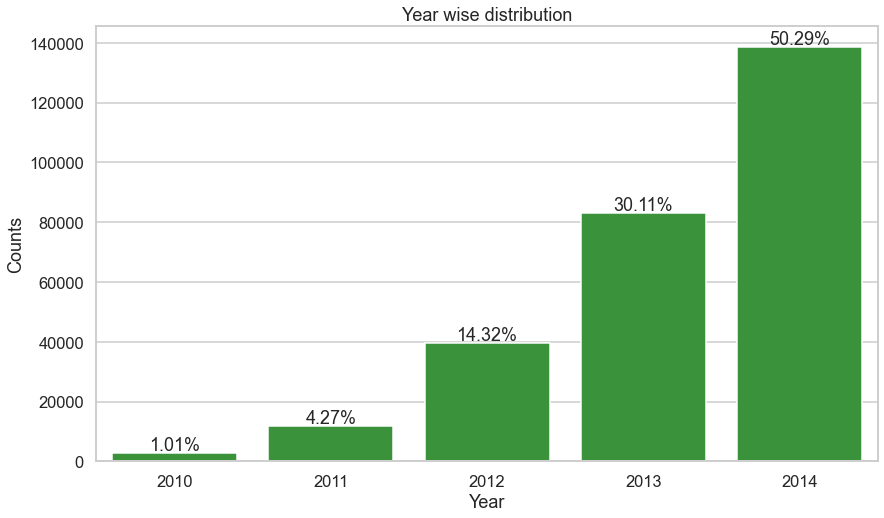

In [42]:
plt.figure(figsize = [14,8])
sns.barplot(data = df_year ,x = 'acc_year',y = 'affiliate_provider',color = sns.color_palette()[2])
plt.title('Year wise distribution')
plt.xlabel('Year')
plt.ylabel('Counts')

for idx in range (df_year.shape[0]):
    count =df_year.iloc[idx]['affiliate_provider']
    getstr = '{:0.2f}%'.format(100*count/df_all.shape[0])
    plt.text(idx ,count+1000,getstr,ha = 'center')

In [46]:
df_month = df_all[df_all['date_account_created'].dt.year == 2014]
df_month['monthYear14'] = df_month['date_account_created'].map(
    lambda x: x.strftime('%m-%Y'))
df_month = df_month.groupby('monthYear14').count()
df_month

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,acc_year
monthYear14,,,,,,,,,,,,,,,
01-2014,11111,11111,11111,5931,11111,11111,11111,11111,11111,10823,11111,11111,11111,11111,11111
02-2014,9967,9967,9967,5312,9967,9967,9967,9967,9967,9736,9967,9967,9967,9967,9967
03-2014,12058,12058,12058,6608,12058,12058,12058,12058,12058,11820,12058,12058,12058,12058,12058
04-2014,12689,12689,12689,7003,12689,12689,12689,12689,12689,12673,12689,12689,12689,12689,12689
05-2014,14895,14895,14895,8065,14895,14895,14895,14895,14895,14879,14895,14895,14895,14895,14895
06-2014,15746,15746,15746,8679,15746,15746,15746,15746,15746,15740,15746,15746,15746,15746,15746
07-2014,21696,21696,21696,11436,21696,21696,21696,21696,21696,21685,21696,21696,21696,0,21696
08-2014,21626,21626,21626,11363,21626,21626,21626,21626,21626,21623,21626,21626,21626,0,21626
09-2014,18774,18774,18774,10069,18774,18774,18774,18774,18774,18768,18774,18774,18774,0,18774


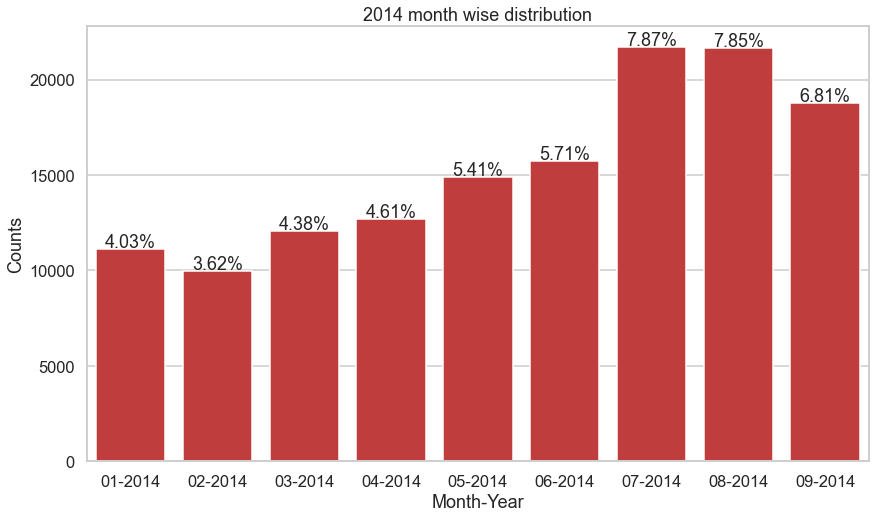

In [47]:
plt.figure(figsize=[14,8])
sns.barplot(data=df_month,x=df_month.index,y='affiliate_provider',color=sns.color_palette()[3]);
plt.title('2014 month wise distribution');
plt.xlabel('Month-Year')
plt.ylabel('Counts')
for i in range(df_month.shape[0]):
    count=df_month.iloc[i]['affiliate_provider']
    strt='{:0.2f}%'.format(100*count/df_all.shape[0])
    plt.text(i,count+100,strt,ha='center')

In [52]:
def age(x):
    
    if 18<x<=20:
        return '18 - 20'
    elif 20<x<=30:
        return '20 - 30'
    elif 30<x<=40:
        return '30 - 40'
    elif 40<x<=50:
        return '40 - 50'
    elif 50 <x<=60:
        return '50 - 60'
    elif 60 <x <=70:
        return '60 - 70'
    elif 70<x<=100:
        return "70+"
    return np.nan
    

In [54]:
df_all['age_bins'] = df_all['age'].apply(
    lambda x : age(x)
)

In [57]:
df_month13 = df_all[df_all['date_account_created'].dt.year == 2013]

df_month13['monthYear13'] = df_month13['date_account_created'].map(
    lambda x: x.strftime('%m-%Y')
)
df_month13 = df_month13.groupby('monthYear13').count()

In [58]:
plt.figure(figsize=[14,8])
sns.barplot(data=df_month13,x=df_month13.index,y='affiliate_provider',color=sns.color_palette()[3]);
plt.title('2014 month wise distribution');
plt.xlabel('Month-Year')
plt.ylabel('Counts')
for i in range(df_month13.shape[0]):
    count=df_month13.iloc[i]['affiliate_provider']
    strt='{:0.2f}%'.format(100*count/df_all.shape[0])
    plt.text(i,count+100,strt,ha='center')

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,acc_year,age_bins
monthYear13,,,,,,,,,,,,,,,,
01-2013,4418,4418,4418,2827,4418,4418,4418,4418,4418,4405,4418,4418,4418,4418,4418,2813
02-2013,4362,4362,4362,2672,4362,4362,4362,4362,4362,4351,4362,4362,4362,4362,4362,2661
03-2013,5421,5421,5421,3082,5421,5421,5421,5421,5421,5399,5421,5421,5421,5421,5421,3059
04-2013,5855,5855,5855,3622,5855,5855,5855,5855,5855,5822,5855,5855,5855,5855,5855,3602
05-2013,6721,6721,6721,4171,6721,6721,6721,6721,6721,6667,6721,6721,6721,6721,6721,4151
06-2013,6765,6765,6765,4149,6765,6765,6765,6765,6765,6705,6765,6765,6765,6765,6765,4126
07-2013,7950,7950,7950,4530,7950,7950,7950,7950,7950,7888,7950,7950,7950,7950,7950,4495
08-2013,8369,8369,8369,4413,8369,8369,8369,8369,8369,8316,8369,8369,8369,8369,8369,4386
09-2013,9125,9125,9125,4676,9125,9125,9125,9125,9125,9074,9125,9125,9125,9125,9125,4653
